# USA Real Estate Machine Learning K-Means

### This notebook contains:

I. libraries and data import

II. elbow technique

III. k-means clustering

IV. 3D modeling

## I. libraries and data import

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [4]:
# graphs are displayed in notebook
%matplotlib inline

In [6]:
# create path shortcut
path = r'C:\Users\lisag\Desktop\CF Work\Immersion 6 Tasks'

In [8]:
# import USA real estate data
df = pd.read_csv(os.path.join(path, 'USA Real Estate Final.csv'))

In [10]:
df.head()

,Unnamed: 0,Broker Number,House Status,House Price,N. Beds,N. Baths,N. Acres,City,State,Zip Code,House SQFT,Last Sell Date
0,0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,1970-01-01
1,1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,1970-01-01
2,2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,1970-01-01
3,3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,1970-01-01
4,4,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,1970-01-01


In [12]:
# recurring data cleaning
# drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])
# change 'brokered_by' to object/string data type
df['Broker Number'] = df['Broker Number'].astype('str')
# change 'zip_code' to object/string data type
df['Zip Code'] = df['Zip Code'].astype('str')
# convert to datetime format and replace zeros will NaT (Not a Time)
df['Last Sell Date'] = pd.to_datetime(df['Last Sell Date'], errors='coerce')

In [14]:
df.dtypes

Broker Number             object
House Status              object
House Price              float64
N. Beds                  float64
N. Baths                 float64
N. Acres                 float64
City                      object
State                     object
Zip Code                  object
House SQFT               float64
Last Sell Date    datetime64[ns]
dtype: object

## II. Elbow Technique

In [17]:
# create index column
df["Index Number"] = df.index + 1

In [19]:
# replace default index
df.set_index("Index Number", inplace=True)

In [21]:
# drop columns that aren't numerical values
k_means_data = df.drop(columns=['Broker Number', 'House Status', 'City', 'State', 'Zip Code', 
                 'Last Sell Date'], inplace=True)

In [23]:
num_cl = range(1, 10) # range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # defines k-means clusters in the range assigned above

In [25]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]  
score

[-5.157772562767092e+16,
 -1.7231096829677492e+16,
 -8352974546497562.0,
 -4933757927766520.0,
 -3196024239462049.0,
 -2355023632854751.0,
 -1743213026514254.2,
 -1413912545297318.8,
 -1077259397763714.8]

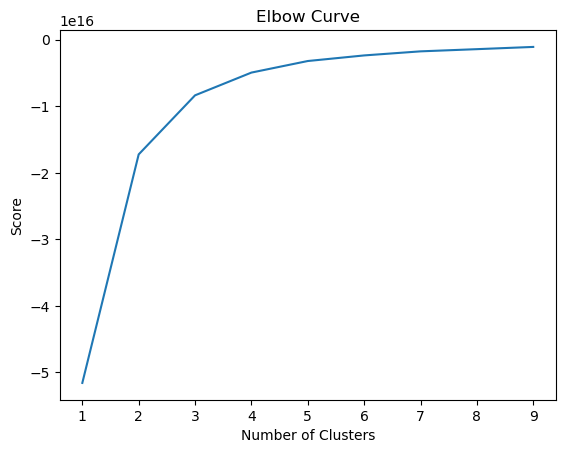

In [26]:
# plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

3-4 will likely be the ideal number of clusters

## III. k-means clustering

In [31]:
# create k-means object
kmeans = KMeans(n_clusters = 3) 

In [33]:
# fit k-means object to data
kmeans.fit(df)

KMeans(n_clusters=3)

In [35]:
# add 'clusters' column
df['clusters'] = kmeans.fit_predict(df)

In [37]:
df['clusters'].value_counts()

clusters
1    516127
0    407789
2    159101
Name: count, dtype: int64

C:\Users\lisag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


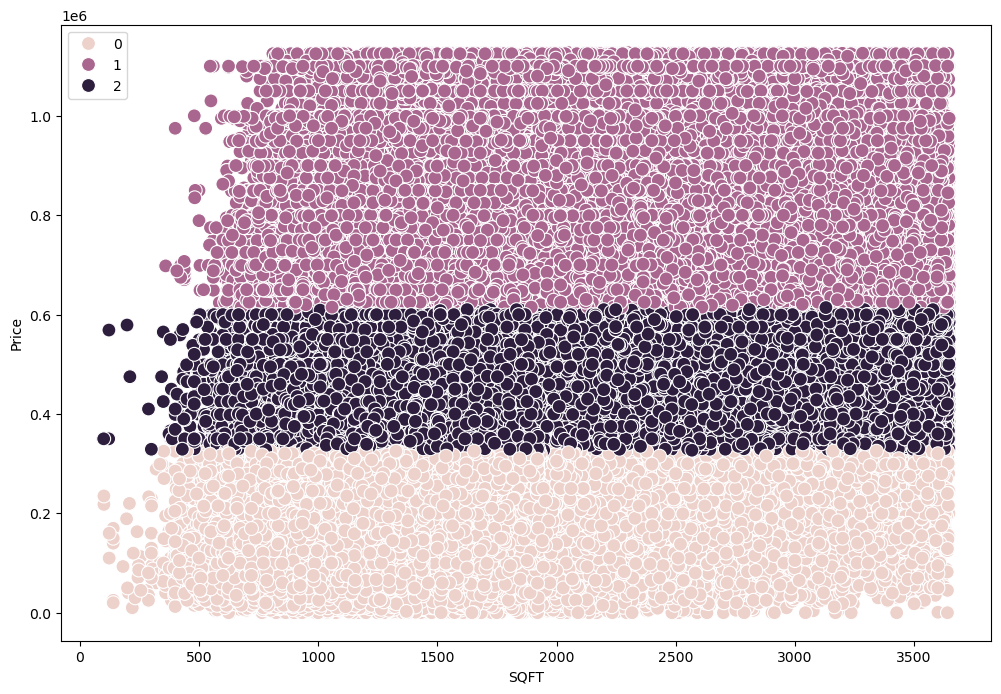

In [42]:
# plot the clusters for the 'House SQFT' and 'House Price' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['House SQFT'], y=df['House Price'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points seen in the plot

ax.grid(False) # removes the grid from the background
plt.xlabel('SQFT') # labels x-axis
plt.ylabel('Price') # labels y-axis
plt.show()

In [39]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [41]:
# descriptive statistics
df.groupby('cluster').agg({'House SQFT':['mean', 'median'], 
                         'House Price':['mean', 'median'],})

House SQFT            House Price          
                    mean  median           mean    median
cluster                                                  
dark purple  2202.483397  2180.0  783323.855079  750000.0
pink         2007.876154  1948.0  443864.328481  430000.0
purple       1527.785518  1456.0  205585.529029  215000.0

C:\Users\lisag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


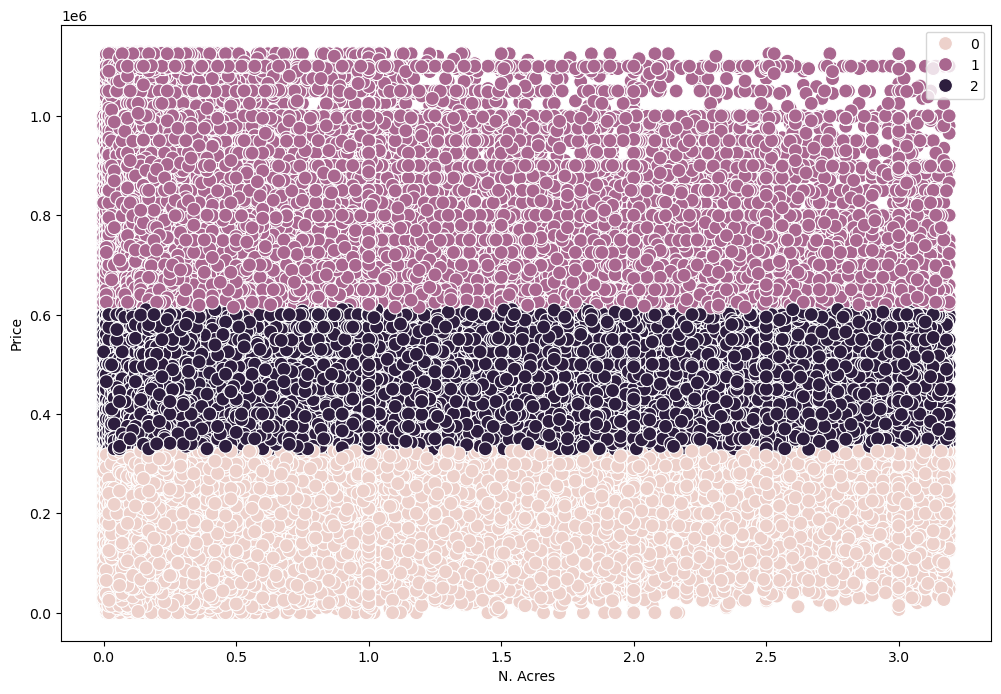

In [48]:
# plot the clusters for the 'N. Acres' and 'House Price' variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['N. Acres'], y=df['House Price'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points seen in the plot

ax.grid(False) # removes the grid from the background
plt.xlabel('N. Acres') # labels x-axis
plt.ylabel('Price') # labels y-axis
plt.show()

In [43]:
# descriptive statistics
df.groupby('cluster').agg({'N. Acres':['mean', 'median'], 
                         'House Price':['mean', 'median'],})

N. Acres           House Price          
                 mean median           mean    median
cluster                                              
dark purple  0.363271   0.19  783323.855079  750000.0
pink         0.352465   0.20  443864.328481  430000.0
purple       0.350598   0.20  205585.529029  215000.0

## IV. 3D Modeling

In [46]:
import plotly.express as px

In [48]:
# drop all NaN values
df2 = df.dropna(subset=["N. Beds", "N. Baths", "House Price"])

In [50]:
# adjust n to a smaller number
df_sample = df2.sample(n=5000, random_state=42)  

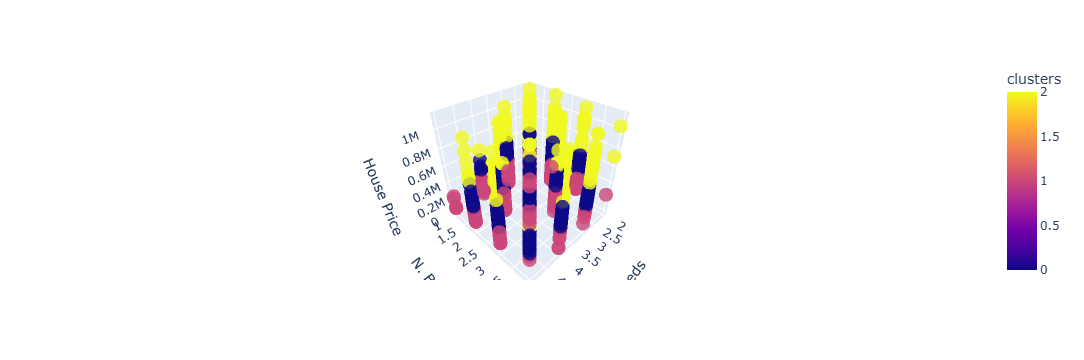

In [72]:
# create 3D scatter plot
fig = px.scatter_3d(df_sample, 
                     x="N. Beds", 
                     y="N. Baths", 
                     z="House Price", 
                     color="clusters",  # color points based on cluster
                     opacity=0.8)  # adjust transparency
plt.tight_layout()
plt.figure(figsize=(20, 14))

fig.show()

In [54]:
# save the figure
plt.savefig("house factors.png", dpi=300, bbox_inches='tight')

### Conclusion:
These analyses indicate that the largest contributor to price is not house size, acreage, number of baths or beds, and so now the next thing that must be analyzed is timing, house status, and location (likely with location being the largest factor).